![](2023-02-09-09-35-08.png)
Image Credits: [Unsplash - Tech Daily]()

# HDSC FALL'22 Capstone Project: Currency Foreign Exchange Rates
## A Project by Team Pycaret

### About Dataset
This is a historical dataset of currency foreign exchange rates. This dataset includes 113 currencies in total with exchange values in varied permutations. It can be used for various task like time series analysis and forecasting. There are approximately 1.4million rows and 7 columns in the dataset.

The data has two main columns in particular:
* slug
* currency
> Slug column is of the form "ABC/PQR" where ABC and PQR are standard active currency codes as of ISO 4217.
>
>Currency contains a currency code which is the unit of the value in the tables. For examples, if slug is JPY/INR and currency is INR it means that
<center>1 JPY = xINR</center>
where x is in INR

The other columns are the regular OHLC (Open - High - Low - Close) columns along with the date


### Load prerequisite libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [1]:
import main_functions as mfn

In [2]:
mfn.data_preview()

,slug,date,open,high,low,close,currency
0,GBP/EGP,2001-04-10,5.58090,5.5947,5.5947,5.5947,EGP
1,GBP/EGP,2001-06-04,5.47517,5.4939,5.4939,5.4939,EGP
2,GBP/EGP,2001-08-01,5.67990,5.6543,5.6543,5.6543,EGP
3,GBP/EGP,2002-07-29,7.21700,7.2170,7.2170,7.2170,EGP
4,GBP/EGP,2003-01-02,7.42429,7.3899,7.3899,7.3899,EGP


In [3]:
mfn.slug_split()

,slug,date,open,high,low,close,currency,A,B
0,GBP/EGP,2001-04-10,5.58090,5.5947,5.5947,5.5947,EGP,GBP,EGP
1,GBP/EGP,2001-06-04,5.47517,5.4939,5.4939,5.4939,EGP,GBP,EGP
2,GBP/EGP,2001-08-01,5.67990,5.6543,5.6543,5.6543,EGP,GBP,EGP
3,GBP/EGP,2002-07-29,7.21700,7.2170,7.2170,7.2170,EGP,GBP,EGP
4,GBP/EGP,2003-01-02,7.42429,7.3899,7.3899,7.3899,EGP,GBP,EGP


#Check the Possiblities for CurA and CurB

In [3]:
curA, curB = mfn.uniq_cur()
print(curA)
print('='*100)
print(curB)

['GBP' 'EUR' 'AUD' 'JPY' 'CHF' 'USD' 'INR']
['EGP' 'SCR' 'NOK' 'SZL' 'MYR' 'PKR' 'NZD' 'CUP' 'CAD' 'CHF' 'ZMW' 'FJD'
 'XOF' 'IDR' 'JPY' 'UAH' 'TWD' 'MMK' 'BRL' 'CNY' 'HUF' 'MXN' 'BMD' 'KWD'
 'BBD' 'TTD' 'SEK' 'BWP' 'HNL' 'CZK' 'ISK' 'LKR' 'USD' 'RON' 'EUR' 'TND'
 'ZAR' 'SGD' 'BYN' 'PEN' 'XPF' 'THB' 'GBP' 'KRW' 'AUD' 'MOP' 'PGK' 'PHP'
 'BSD' 'CRC' 'JOD' 'MZN' 'TRY' 'BGN' 'DJF' 'COP' 'INR' 'BAM' 'PLN' 'SAR'
 'ARS' 'IRR' 'NIO' 'MWK' 'LBP' 'IQD' 'KES' 'UGX' 'KZT' 'NGN' 'GTQ' 'PYG'
 'ETB' 'SVC' 'VND' 'BND' 'MAD' 'KYD' 'ILS' 'MKD' 'HKD' 'RUB' 'AED' 'GMD'
 'BZD' 'SLL' 'MVR' 'DKK' 'MUR' 'JMD' 'OMR' 'DZD' 'BOB' 'GHS' 'RSD' 'TZS'
 'UZS' 'BDT' 'CLP' 'MGA' 'QAR' 'ANG' 'HTG' 'BHD' 'ALL' 'BIF' 'SOS' 'MDL'
 'PAB' 'XAF' 'SDG' 'DOP' 'UYU']


Data Visualization

In [3]:
mfn.plot_viz('AUD', True, 0, 1)

#Choose a CurA

In [1]:
import main_functions as mfn

In [2]:
A_data = mfn.select_curA()

Possible Currency B for EUR 
 ==================================================================================================== ['SZL' 'PKR' 'FJD' 'MMK' 'BWP' 'RON' 'UAH' 'PEN' 'THB' 'KRW' 'USD' 'MOP'
 'CRC' 'JOD' 'PGK' 'COP' 'AUD' 'BAM' 'PLN' 'ARS' 'INR' 'CNY' 'SCR' 'SVC'
 'MAD' 'PHP' 'KYD' 'TWD' 'ZAR' 'MKD' 'IRR' 'LBP' 'RUB' 'CHF' 'KES' 'BRL'
 'NZD' 'MYR' 'DKK' 'BMD' 'OMR' 'BGN' 'BOB' 'GHS' 'SGD' 'CZK' 'BND' 'NOK'
 'BSD' 'AED' 'NIO' 'GBP' 'HKD' 'MGA' 'ANG' 'TND' 'TRY' 'ETB' 'ILS' 'MWK'
 'CLP' 'IDR' 'SEK' 'HNL' 'SAR' 'QAR' 'KZT' 'JPY' 'CAD' 'MXN' 'HUF' 'IQD']


Shapes of all currency combos for choshen cur a

In [3]:
mapp = mfn.posB_dfs(A_data, shape=True)

SZL (4140, 9)
PKR (4204, 9)
FJD (4562, 9)
MMK (3935, 9)
BWP (4000, 9)


Choose a Currency B

In [4]:
A_B = mfn.select_curB(mapp)

Missing entries 
DatetimeIndex(['2006-05-20', '2006-05-21', '2006-05-27', '2006-05-28',
               '2006-06-03', '2006-06-04', '2006-06-10', '2006-06-11',
               '2006-06-17', '2006-06-18',
               ...
               '2021-07-31', '2021-08-01', '2021-08-07', '2021-08-08',
               '2021-08-14', '2021-08-15', '2021-08-21', '2021-08-22',
               '2021-08-28', '2021-08-29'],
              dtype='datetime64[ns]', length=1650, freq=None)


#Data Preprocessing: Upsampling and forward fill


In [5]:
weekly = mfn.upsample(A_B)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)
open     6
high     6
low      6
close    0
dtype: int64
Weekly Data Shape: (799, 4)


Plot all features to check if any independant features are present

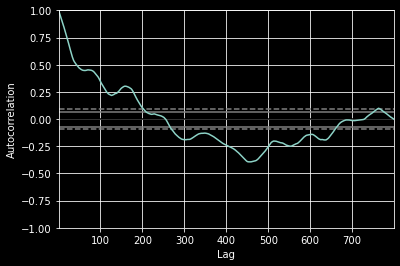

In [6]:
mfn.weekly_plot(weekly, closing=True, auto_corr=True)

#Visualize the stationarity using rolling stats and check ADF test values

In [7]:
mfn.test_stationarity(weekly[0]['close'])

Results of dickey fuller test
Test Statistics                 -2.178086
p-value                          0.214295
No. of lags used                 1.000000
Number of observations used    797.000000
critical value (1%)             -3.438581
critical value (5%)             -2.865173
critical value (10%)            -2.568705
dtype: float64


#Decompose time series to visualize Trends, Seasonalities and Residuals

<Figure size 432x288 with 0 Axes>

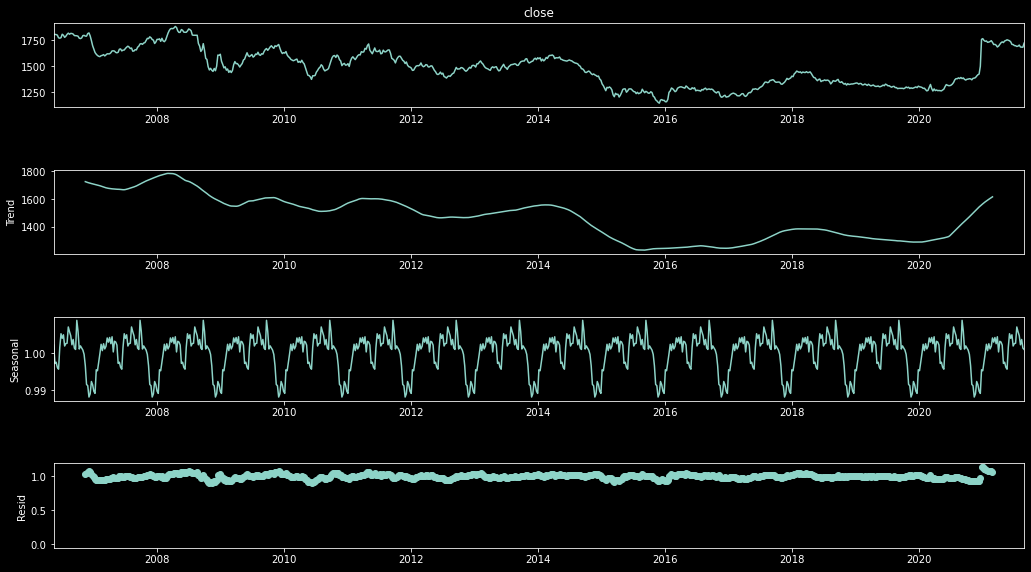

In [8]:
mfn.seasonal_decomp(weekly[0]['close'])

#use log to stabilize the time series and make it stationary

In [9]:
df_log = mfn.conv_to_statn(weekly[0]['close'])

In [35]:
train, test = mfn.train_test_split(df_log)

Auto Arima Model

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4293.772, Time=0.66 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4321.086, Time=0.66 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4318.599, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4294.547, Time=0.43 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4319.427, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4319.334, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4317.502, Time=1.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-4322.245, Time=0.40 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-4320.618, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-4320.518, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-4319.670, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-4318.692, Time=0.51 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 6.517 seconds
                               SARIMAX Results                              

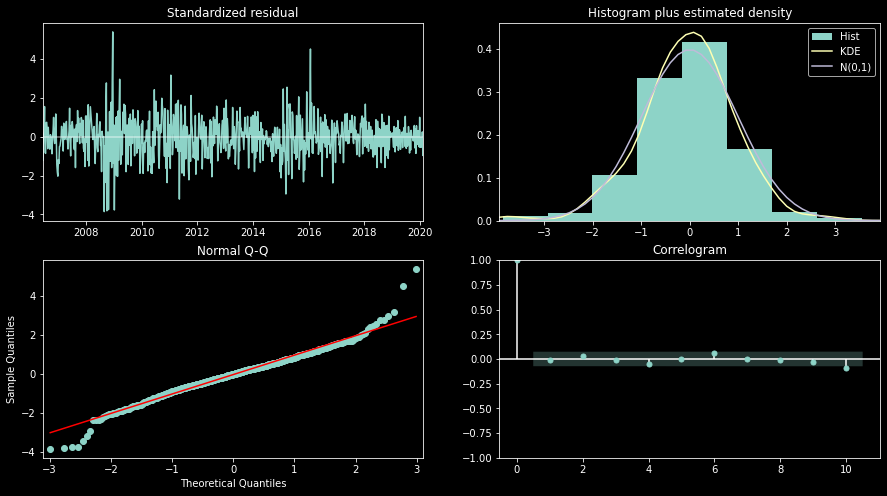

In [11]:
mfn.aut_arima(train)

In [12]:
mfn.arima(train, test, True)

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  716
Model:                 ARIMA(1, 1, 2)   Log Likelihood                2163.446
Date:                Tue, 14 Feb 2023   AIC                          -4318.891
Time:                        09:29:59   BIC                          -4300.602
Sample:                    06-04-2006   HQIC                         -4311.828
                         - 02-16-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0377      0.358     -0.105      0.916      -0.739       0.663
ma.L1          0.2353      0.354      0.664      0.507      -0.459       0.930
ma.L2          0.0817      0.069      1.181      0.2

#Train and test FB prophet and compare the two models to see which performs better

In [ ]:
mfn.prophet_model(train, test, True)

In [17]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [18]:
import plotly.graph_objects as go
import plotly.offline as po
po.init_notebook_mode(connected=True)
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


In [42]:
df_close = weekly[0]['close'] 
df_log = np.log(df_close)
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

In [41]:
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.04729997975335415
MAE: 0.17511715780846937
RMSE: 0.21748558516222208
MAPE: 0.023644659428604723


#Train and test FB prophet and compare the two models to see which performs better

In [22]:
# !pip install pystan~=2.14
# !pip install fbprophet

In [32]:
from prophet import Prophet

In [30]:
prophet_model(train, test, True)

10:08:35 - cmdstanpy - INFO - Chain [1] start processing
10:08:40 - cmdstanpy - INFO - Chain [1] done processing


MSE: 86457.99376807378
MAE: 226.21493689526488
RMSE: 294.0374019883759
MAPE: 0.13625578357267712


In [43]:
train_df=pd.DataFrame(train_data)
train_df["ds"]=train_df.index
train_df["y"]=train_df["close"]

In [44]:
model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=False, weekly_seasonality=True)
model.fit(train_df)

11:21:16 - cmdstanpy - INFO - Chain [1] start processing
11:21:20 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future = model.make_future_dataframe(periods=len(test_data), freq='W-SUN',include_history=False)
forecast = model.predict(future)

In [48]:
len(forecast["yhat"])

80

In [47]:
fs=pd.Series(forecast["yhat"])
fs.index=forecast.ds
fs

ds
2020-02-23    7.176662
2020-03-01    7.176430
2020-03-08    7.176197
2020-03-15    7.175964
2020-03-22    7.175731
                ...   
2021-08-01    7.159204
2021-08-08    7.158971
2021-08-15    7.158738
2021-08-22    7.158506
2021-08-29    7.158273
Name: yhat, Length: 80, dtype: float64

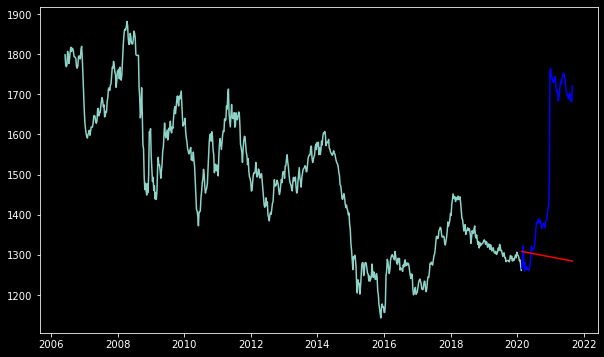

In [48]:
plt.plot(np.exp(train_data), label='training data')
plt.plot(np.exp(test_data), color = 'blue', label='Actual Forex rates')
plt.plot(np.exp(fs), color = 'red',label='Predicted Forex rates')

In [49]:
mse = mean_squared_error(test_data, fs)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fs)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fs))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fs - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.03891441145597244
MAE: 0.15388111536780053
RMSE: 0.19726736034116857
MAPE: 0.02075620137222326


#Results

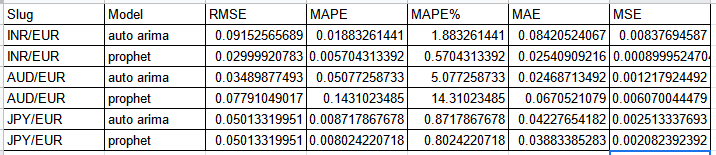